<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RecSys/blob/main/Ariel%20Chernyy/Inspectrum_clinic_05_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и загрузка

In [ ]:
import numpy as np
import pandas as pd
import xlrd
import copy
import pickle
import os
import json
import re
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, precision_score, recall_score

from scipy.spatial import distance

import xgboost as xgb
import lightgbm as lgbm

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import Accuracy, Precision, Recall

from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant

In [ ]:
data = pd.read_csv('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv', sep = ';')

<ipython-input-2-a5806ce681cc>:1: DtypeWarning: Columns (16,18,19,20,22,23,25,26,27,29,30,32,35,36,37,39,40,41,42,43,44,46,47,49,50,52,53,54,55,56,57,58,59,60,61,62,63,64,66,68,70,74,75,77,78,80,81,82,84,85,87,90,91,92,95,96,97,99,100,101,103,104,108,109,114,115,116,120,122,123,124,126,127,128,130,131,133,138,139,142,143,145,146,148,149,153,154,155,157,158,160,161,162,164,165,167,168,170,171,173,175,176,177,178,179,180,181,182,183,184,188,189,191,192,194,195,196,201,202,204,208,209,210,211,214,215,216,217,218,220,221,222,224,225,228,229,230,231,233,234,235,236,240,241,242,243,244,245,246,247,248,250,258,260,262,265,266,269,270,272,273,274,276,277,278,280,281,282,283,284,285,286,287,288) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://storage.yandexcloud.net/terratraineeship/23_InspectrumClinic_RS/datasets/%D0%92%D0%B5%D1%81%D1%8C%20%D0%BF%D0%B5%D1%80%D0%B8%D0%BE%D0%B4.csv', sep = ';')


In [ ]:
data.to_csv('data.csv', index=False, sep =';')

In [ ]:
data.shape

(32686, 289)

In [ ]:
data.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
raw_feature_dtypes = data.dtypes
raw_feature_dtypes

ДокументПрохождениеМедосмотра    object
Клиент                           object
КлиентДатаРождения               object
КлиентПол                        object
КлиентПолПредставление           object
                                  ...  
ЭКГНеИсп1_МКБ102                 object
ЭКГНеИсп2_МКБ101                 object
ЭКГНеИсп2_МКБ102                 object
Эндоскопия1_МКБ101               object
Эндоскопия1_МКБ102               object
Length: 289, dtype: object

In [ ]:
raw_feature_dtypes.value_counts()

object     213
float64     75
bool         1
dtype: int64

In [ ]:
def read_text(data_path):
  with open(data_path, 'r') as f:
    data_text = f.read()
  #re_object = re.compile(r'[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*;[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*;\d{4}-\d{2}-\d{2}')
  re_object = re.compile(r'(\d*\W*\d*\W+\d+\W*);( )')
  data_text = re_object.sub(r'\1\2', data_text)
  re_object = re.compile(r'[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*;[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*')
  splitted_lines = re_object.split(data_text)[1:]
  splits = re_object.findall(data_text)
  lines = []
  for elem in zip(splits, splitted_lines):
    line = elem[0] + elem[1]
    lines.append(line)
  return lines

In [ ]:
data_path = '/content/data.csv'

In [ ]:
with open(data_path, 'r') as f:
  data_text = f.read()

##### список всех фичей

In [ ]:
re_object = re.compile(r'[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*;[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*-[\w|\d]*')
features = data_text[:re_object.search(data_text).span()[0]-1].split(';')
print(len(features))
features

289


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_Диагноз_ЗначениеПредставлениеПредставление',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерм

In [ ]:
lines = read_text(data_path)
print(len(lines))

32686


In [ ]:
res = []

for i, line in enumerate(lines):
  if len(line.split(';'))!=289:
    res.append(i)
    print(i, len(line.split(';')))

16263 284


In [ ]:
data_clean = pd.DataFrame([line.split(';') for line in lines], columns = features)

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Columns: 289 entries, ДокументПрохождениеМедосмотра to Эндоскопия1_МКБ102
dtypes: object(289)
memory usage: 72.1+ MB


In [ ]:
data_clean_num = pd.concat([pd.to_numeric(data_clean[feature], errors = 'ignore') for feature in data_clean.columns], axis=1)

In [ ]:
data_clean_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Columns: 289 entries, ДокументПрохождениеМедосмотра to Эндоскопия1_МКБ102
dtypes: float64(76), object(213)
memory usage: 72.1+ MB


In [ ]:
data_clean_num.head()

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп3_Диагноз_ЗначениеПредставлениеПредставление,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,,,,,,,,,\n
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,,,,,,,,,\n
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,,,,,,,,,\n
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,,,,,,,,,\n
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,,,,,,,,,\n


# первичный анализ

In [ ]:
features_na_counts = data_clean_num.isna().sum().sort_values(ascending=False)
features_na_counts

Психиатрия3_Диагноз_ЗначениеПредставлениеПредставление              32686
Неврология4_Диагноз_ЗначениеПредставлениеПредставление              32686
ПроцедурнаяМедсестра3_МКБ102                                        32686
ПроцедурнаяМедсестра3_МКБ103                                        32686
Психиатрия1_Диагноз_ЗначениеПредставлениеПредставление              32686
                                                                    ...  
ПсихиатрияНаркология1_МКБ102                                            0
ПсихиатрияНаркология1_МКБ103                                            0
ПсихиатрияНаркология2_Диагноз_ЗначениеПредставлениеПредставление        0
ПсихиатрияНаркология2_МКБ101                                            0
ДокументПрохождениеМедосмотра                                           0
Length: 289, dtype: int64

In [ ]:
features_na_counts[features_na_counts<len(data_clean_num)]

ЭКГНеИсп1_МКБ102                                                    1
ЭКГНеИсп2_МКБ101                                                    1
ЭКГНеИсп2_МКБ102                                                    1
Эндоскопия1_МКБ101                                                  1
Эндоскопия1_МКБ102                                                  1
                                                                   ..
ПсихиатрияНаркология1_МКБ102                                        0
ПсихиатрияНаркология1_МКБ103                                        0
ПсихиатрияНаркология2_Диагноз_ЗначениеПредставлениеПредставление    0
ПсихиатрияНаркология2_МКБ101                                        0
ДокументПрохождениеМедосмотра                                       0
Length: 213, dtype: int64

In [ ]:
features_na_counts.value_counts()

0        208
32686     76
1          5
dtype: int64

In [ ]:
data_clean_num[['ЭКГНеИсп1_МКБ102','ЭКГНеИсп2_МКБ101','ЭКГНеИсп2_МКБ102', 'Эндоскопия1_МКБ101', 'Эндоскопия1_МКБ102']][data_clean_num['ЭКГНеИсп1_МКБ102'].isna()]

,ЭКГНеИсп1_МКБ102,ЭКГНеИсп2_МКБ101,ЭКГНеИсп2_МКБ102,Эндоскопия1_МКБ101,Эндоскопия1_МКБ102
16263,None,None,None,None,None


In [ ]:
rows_na_counts = data_clean_num.isna().sum(axis=1).sort_values(ascending=False)
rows_na_counts

16263    81
21832    76
21798    76
21797    76
21796    76
         ..
10891    76
10890    76
10889    76
10888    76
32685    76
Length: 32686, dtype: int64

In [ ]:
features_only_na = features_na_counts[features_na_counts==len(data_clean_num)].index.tolist()
print(len(features_only_na))
features_only_na

76


['Психиатрия3_Диагноз_ЗначениеПредставлениеПредставление',
 'Неврология4_Диагноз_ЗначениеПредставлениеПредставление',
 'ПроцедурнаяМедсестра3_МКБ102',
 'ПроцедурнаяМедсестра3_МКБ103',
 'Психиатрия1_Диагноз_ЗначениеПредставлениеПредставление',
 'Психиатрия1_КлиническийДиагноз_ЗначениеПредставлениеПредставление',
 'Психиатрия2_Диагноз_ЗначениеПредставлениеПредставление',
 'Психиатрия2_КлиническийДиагноз_ЗначениеПредставлениеПредставление',
 'Психиатрия4_Диагноз_ЗначениеПредставлениеПредставление',
 'ДерматовенерологНеИсп2_Диагноз_ЗначениеПредставлениеПредставление',
 'ПсихиатрияНаркология1_Диагноз_ЗначениеПредставлениеПредставление',
 'ПсихиатрияНаркология1_КлиническийДиагноз_ЗначениеПредставлениеПредставление',
 'ДерматовенерологНеИсп1_Диагноз_ЗначениеПредставлениеПредставление',
 'ПсихиатрияНаркология3_Диагноз_ЗначениеПредставлениеПредставление',
 'ПсихиатрияНаркология4_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология4_Диагноз_ЗначениеПредставлениеПредставление',
 'Пси

In [ ]:
features_not_na = features_na_counts[features_na_counts!=len(data_clean_num)].index.tolist()
features_not_na

['ЭКГНеИсп1_МКБ102',
 'ЭКГНеИсп2_МКБ101',
 'ЭКГНеИсп2_МКБ102',
 'Эндоскопия1_МКБ101',
 'Эндоскопия1_МКБ102',
 'Неврология3_МКБ102',
 'Неврология3_МКБ103',
 'Терапия2_МКБ101',
 'Терапия2_МКБ102',
 'Терапия2_МКБ103',
 'Терапия2_МКБ104',
 'Терапия2_МКБ105',
 'Терапия2_МКБ106',
 'Гинекология4_МКБ102',
 'Терапия3_МКБ101',
 'Терапия3_МКБ102',
 'Терапия3_МКБ103',
 'Гинекология4_МКБ101',
 'Терапия4_МКБ101',
 'Терапия4_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология3_МКБ102',
 'Терапия5_МКБ101',
 'Терапия5_МКБ102',
 'Терапия5_МКБ103',
 'Терапия5_МКБ104',
 'Гинекология3_МКБ101',
 'Терапия6_МКБ101',
 'Терапия6_МКБ102',
 'Терапия6_МКБ103',
 'ГинекологНеИсп1_МКБ101',
 'Терапия1_МКБ106',
 'Терапия1_МКБ105',
 'Дерматовенерология2_МКБ102',
 'Стоматология1_МКБ102',
 'Стоматология1_МКБ103',
 'Стоматология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Стоматология2_МКБ101',
 'Стоматология2_МКБ102',
 'Стоматология2_МКБ103',
 'Дерматовенерология2_МКБ103',
 'Стоматология3_МКБ101',
 'Стоматология3_МКБ102',


In [ ]:
features_not_na = features_na_counts[features_na_counts == 0].index.tolist()
print(len(features_not_na))
features_not_na

208


['Неврология3_МКБ102',
 'Неврология3_МКБ103',
 'Терапия2_МКБ101',
 'Терапия2_МКБ102',
 'Терапия2_МКБ103',
 'Терапия2_МКБ104',
 'Терапия2_МКБ105',
 'Терапия2_МКБ106',
 'Гинекология4_МКБ102',
 'Терапия3_МКБ101',
 'Терапия3_МКБ102',
 'Терапия3_МКБ103',
 'Гинекология4_МКБ101',
 'Терапия4_МКБ101',
 'Терапия4_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология3_МКБ102',
 'Терапия5_МКБ101',
 'Терапия5_МКБ102',
 'Терапия5_МКБ103',
 'Терапия5_МКБ104',
 'Гинекология3_МКБ101',
 'Терапия6_МКБ101',
 'Терапия6_МКБ102',
 'Терапия6_МКБ103',
 'ГинекологНеИсп1_МКБ101',
 'Терапия1_МКБ106',
 'Терапия1_МКБ105',
 'Дерматовенерология2_МКБ102',
 'Стоматология1_МКБ102',
 'Стоматология1_МКБ103',
 'Стоматология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Стоматология2_МКБ101',
 'Стоматология2_МКБ102',
 'Стоматология2_МКБ103',
 'Дерматовенерология2_МКБ103',
 'Стоматология3_МКБ101',
 'Стоматология3_МКБ102',
 'Стоматология3_МКБ103',
 'Дерматовенерология2_МКБ101',
 'Терапия1_МКБ104',
 'Дерматовенерология2_Диагноз_Зна

##### features_not_na - список фичей с не-NA значениями

In [ ]:
features_not_na = [feature for feature in data_clean_num.columns if feature in features_not_na] # восстанавливаю исходный порядок колонок
print(len(features_not_na))
features_not_na

208


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_Диагноз_ЗначениеПредставлениеПредставлени

In [ ]:
data_not_na = data_clean_num[features_not_na]
data_not_na

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп1_МКБ101,ХирургНеИсп1_МКБ102,ХирургНеИсп1_МКБ103,ХирургНеИсп2_МКБ101,ХирургНеИсп2_МКБ102,ХирургНеИсп2_МКБ103,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,,,,,,,,,,
1,78efe744-9c36-11eb-80eb-0cc47aab8067,b35fb2bb-9c35-11eb-80eb-0cc47aab8067,1998-07-20T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,,,,,,,,,,
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,,,,,,,,,,
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,,,,,,,,,,
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,0dc1a36a-0e78-11ee-8133-0cc47aab8067,c31ae865-e5bb-11ed-812b-0cc47aab8067,1971-06-04T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,2e01d3ec-615e-11eb-80e7-0cc47aab8067,...,,,,,,,,,,
32682,43a376cb-0e53-11ee-8133-0cc47aab8067,71fb1a04-28f6-11e7-80d5-708bcd7f83cd,1978-12-12T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,e935abf8-4ed4-11e9-80ce-0cc47aab8067,...,,,,,,,,,,
32683,f2163f48-0e61-11ee-8133-0cc47aab8067,c5c58eaf-cb1b-11ea-80e0-0cc47aab8067,1995-01-27T00:00:00,Женский,Женский,2023-06-19T00:00:00,Периодический,Периодический,False,250639b6-68c4-11e8-80ce-0cc47aab8067,...,,,,,,,,,,
32684,346a9c13-0e65-11ee-8133-0cc47aab8067,d942cc21-e669-11ec-8102-0cc47aab8067,1975-02-18T00:00:00,Мужской,Мужской,2023-06-19T00:00:00,Периодический,Периодический,False,c9d539ae-91a3-11e9-80cf-0cc47aab8067,...,,,,,,,,,,


In [ ]:
rows_na_counts = data_not_na.isna().sum(axis=1)
rows_na_counts

0        0
1        0
2        0
3        0
4        0
        ..
32681    0
32682    0
32683    0
32684    0
32685    0
Length: 32686, dtype: int64

In [ ]:
data_not_na.iloc[0,:].value_counts()

                                        188
Z00.0                                     6
Женский                                   2
Периодический                             2
Годен к работе в указанных условиях       2
79292387-652a-11eb-80e7-0cc47aab8067      1
dca98d4e-2098-11ea-80d6-0cc47aab8067      1
1989-12-31T00:00:00                       1
2021-02-02T00:00:00                       1
False                                     1
3d01b2d6-ae08-11e9-80cf-0cc47aab8067      1
Продавец-кассир                           1
Годен                                     1
Name: 0, dtype: int64

In [ ]:
['ДокументПрохождениеМедосмотра',
 'Клиент',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование']

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование']

In [ ]:
features_descr = [
'ДокументПрохождениеМедосмотра',
'Клиент',
'КлиентДатаРождения',
'КлиентПол',
'КлиентПолПредставление',
'ДатаЗавершенияМедосмотра',
'ТипМедосмотра',
'ТипМедосмотраПредставление',
'ПсихОсвидетельствование',
'Контрагент',
'Цех',
'Профессия',
'ЗаключениеМК',
'ЗаключениеМКПредставление',
'Заключение',
'ВредныеФакторы']
print(len(features_descr))
features_descr

16


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы']

In [ ]:
features_details = [feature for feature in features_not_na if feature not in features_descr]
print(len(features_details))
features_details

192


['Гинекология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология3_МКБ101',
 'Дерматовенерология3_МКБ102',
 'Дерматовенерология3_МКБ103',
 'Дерматовенерология4_МКБ101',
 'Дерматовенерология4_МКБ102',
 'ДерматовенерологНеИсп1_МКБ101',
 'ДерматовенерологНеИсп1_МКБ102',
 'ДерматовенерологНеИсп2_МКБ101',
 'ДерматовенерологНеИсп2_МКБ102',
 'ЛабораторнаяДиагностика1_МКБ101',
 '

## Зависимая переменная

In [ ]:
data_not_na[['ЗаключениеМК', 'ЗаключениеМКПредставление', 'Заключение']]

,ЗаключениеМК,ЗаключениеМКПредставление,Заключение
0,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
1,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
2,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
3,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
4,Годен,Годен к работе в указанных условиях,Годен к работе в указанных условиях
...,...,...,...
32681,,,
32682,,,
32683,,,
32684,,,


In [ ]:
data_not_na['ЗаключениеМК'].value_counts()

Годен                               17982
                                    13482
ГоденСКоррекциейЗрения               1114
ГоденБезРаботНаВысотах                 52
НуждаетсяВДообследованииИЛечении       40
ГоденСКоррекциейСлуха                   5
ОграниченноГоден                        4
Негоден                                 3
Газоспасатель                           2
машинист бульдозера                     1
 Газоспасатель                          1
Name: ЗаключениеМК, dtype: int64

##### удаляю некорректные значения

In [ ]:
data_aux = data_not_na[(~data_not_na['ЗаключениеМК'].str.contains('Газоспасатель'))&(~data_not_na['ЗаключениеМК'].str.contains('машинист бульдозера'))&(data_not_na['ЗаключениеМК']!='')]
print(data_aux.shape)

(19200, 208)


In [ ]:
target_raw = data_aux['ЗаключениеМК']
target_raw.value_counts()

Годен                               17982
ГоденСКоррекциейЗрения               1114
ГоденБезРаботНаВысотах                 52
НуждаетсяВДообследованииИЛечении       40
ГоденСКоррекциейСлуха                   5
ОграниченноГоден                        4
Негоден                                 3
Name: ЗаключениеМК, dtype: int64

In [ ]:
yes = np.where(target_raw=='Годен', 1, 0)
no = np.where((target_raw=='Негоден')|(target_raw=='НуждаетсяВДообследованииИЛечении'), 1, 0)
maybe = np.where((yes!=1)&(no!=1), 1,0)

target = pd.DataFrame({'yes':yes, 'maybe':maybe, 'no':no}, index = data_aux.index)
target

,yes,maybe,no
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
32512,1,0,0
32513,1,0,0
32514,1,0,0
32515,1,0,0


In [ ]:
target.sum()

yes      17982
maybe     1175
no          43
dtype: int64

In [ ]:
target_stacked = np.select([target_raw=='Годен',
                            (target_raw!='Годен')&(target_raw!='Негоден')&(target_raw!='НуждаетсяВДообследованииИЛечении'),
                            (target_raw=='Негоден')|(target_raw=='НуждаетсяВДообследованииИЛечении')],
                           ['Годен', 'Ограниченно годен', 'Не годен'])
target_stacked = pd.DataFrame(target_stacked, index = data_aux.index, columns = ['Годность'])
target_stacked

,Годность
0,Годен
1,Годен
2,Годен
3,Годен
4,Годен
...,...
32512,Годен
32513,Годен
32514,Годен
32515,Годен


In [ ]:
target_stacked.value_counts()

Годность         
Годен                17982
Ограниченно годен     1175
Не годен                43
dtype: int64

## Независимые переменные

буду собирать обработанные независимые переменные в dataframe X

In [ ]:
X = pd.DataFrame(index = data_aux.index)

In [ ]:
list(data_aux.columns)

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_Диагноз_ЗначениеПредставлениеПредставлени

#### обработка столбца "вредные факторы"

In [ ]:
data_aux['ВредныеФакторы'].value_counts()

23                                     2982
25                                      853
                                        715
04.02.2005                              510
27                                      482
                                       ... 
1.15,4.3.2,4.4,4.7,6.2,17,18.2            1
1.15,4.3.2,4.4,4.7,6.2,17,18.1,18.2       1
11,18.1,3.1,4.4,5.1                       1
4.1,4.2.5,11.1,11.4                       1
18.2,23,5.1,4.3.2,1.50                    1
Name: ВредныеФакторы, Length: 2206, dtype: int64

In [ ]:
data_aux['ВредныеФакторы'][data_aux['ВредныеФакторы']=='']=np.nan

<ipython-input-45-aa22491abc68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux['ВредныеФакторы'][data_aux['ВредныеФакторы']=='']=np.nan


In [ ]:
factors_list = []
for elem in data_aux['ВредныеФакторы']:
  factors_list += str(elem).split(',')
factors_list = list(set(factors_list))
factors_list

['4.6',
 '1.14.1',
 '1.53.2',
 '03.фев',
 '1.22',
 '6',
 '1.36.2',
 '6.1',
 '16',
 '1.50',
 '4.8',
 '1.14.2',
 '04.авг',
 '1.8.3',
 '1.14',
 '1.39',
 '04.03.2001',
 '1.36',
 '1.47.7',
 '18',
 '3.2',
 '3.4',
 '1.29.3',
 '1.37.1.2',
 '1.4',
 '1.38',
 '6.2',
 '1.29.4',
 '1.49.4',
 '7',
 '1.8.3.2',
 '1.12',
 '18.фев',
 '1.51.1',
 'nan',
 '1.46',
 '4.2.3',
 '1.1',
 '18.1',
 '3.1.7',
 '04.02.2005',
 '1.48',
 '5.2.1',
 '4.4',
 '5.2.2',
 '1.23',
 '27',
 '2.3',
 '1.42',
 '3.1.5',
 '18.янв',
 '1.40',
 '1.17',
 '05.янв',
 '4.3.1',
 '3.1.8',
 '1.52',
 '2.4.1',
 '1.47.1',
 '1.36.1',
 '2.4.2',
 '1.30.1',
 '19.1',
 'янв.25',
 '25',
 '1.43.1',
 '06.фев',
 '1.51.2',
 '12',
 '1.27.1',
 '11.3',
 '1.37.1.1',
 '4.2.1',
 '1.43',
 '2.4.3',
 '1.51',
 '11.мар',
 'янв.50',
 '1.8.1.1',
 '1.19.1',
 '11.янв',
 '04.янв',
 '1.44',
 'янв.48',
 '4.1',
 '8',
 '1.6',
 '1.5',
 '4.2',
 '1.10',
 '1.8.1',
 '3.1.3',
 '1.52.5',
 '04.02.2004',
 '13',
 '1.5.1',
 '1.37.1',
 '2.4.4',
 '04.сен',
 '1.24',
 '11.апр',
 '4.2.5',
 '1.1

In [ ]:
data_aux['ВредныеФакторы'].value_counts(dropna=False)

23                                     2982
25                                      853
NaN                                     715
04.02.2005                              510
27                                      482
                                       ... 
1.15,4.3.2,4.4,4.7,6.2,17,18.2            1
1.15,4.3.2,4.4,4.7,6.2,17,18.1,18.2       1
11,18.1,3.1,4.4,5.1                       1
4.1,4.2.5,11.1,11.4                       1
18.2,23,5.1,4.3.2,1.50                    1
Name: ВредныеФакторы, Length: 2206, dtype: int64

##### неправильные строки убираю из всего датасета

In [ ]:
data_aux = data_aux[~(data_aux['ВредныеФакторы'].str.contains(r'[а-яА-Яa-zA-Z]', na=False)|data_aux['ВредныеФакторы'].str.contains(r'\d{4}', na=False))]
print(data_aux.shape)

(17665, 208)


In [ ]:
data_aux['ВредныеФакторы'].value_counts(dropna=False)

23                                2982
25                                 853
NaN                                715
27                                 482
26                                 393
                                  ... 
1.23,3.1.7,4.7,4.8,6.1,11.4,13       1
11.1,1.48                            1
6,6.1,6.2,11,11.1,11.3               1
4.3.2,6,8,11,18,18.2                 1
18.2,23,5.1,4.3.2,1.50               1
Name: ВредныеФакторы, Length: 2174, dtype: int64

In [ ]:
factors_list = []
for elem in data_aux['ВредныеФакторы']:
  factors_list += str(elem).split(',')
factors_list = list(set(factors_list))
factors_list

['4.6',
 '1.14.1',
 '1.53.2',
 '1.22',
 '6',
 '1.36.2',
 '6.1',
 '16',
 '1.50',
 '4.8',
 '1.14.2',
 '1.8.3',
 '1.14',
 '1.39',
 '1.36',
 '1.47.7',
 '18',
 '3.2',
 '3.4',
 '1.29.3',
 '1.37.1.2',
 '1.4',
 '1.38',
 '6.2',
 '1.29.4',
 '1.49.4',
 '7',
 '1.8.3.2',
 '1.12',
 '1.51.1',
 'nan',
 '1.46',
 '4.2.3',
 '1.1',
 '18.1',
 '3.1.7',
 '1.48',
 '5.2.1',
 '4.4',
 '5.2.2',
 '1.23',
 '27',
 '2.3',
 '1.42',
 '3.1.5',
 '1.40',
 '1.17',
 '4.3.1',
 '3.1.8',
 '1.52',
 '2.4.1',
 '1.47.1',
 '1.36.1',
 '2.4.2',
 '1.30.1',
 '19.1',
 '25',
 '1.43.1',
 '1.51.2',
 '12',
 '1.27.1',
 '11.3',
 '1.37.1.1',
 '4.2.1',
 '1.43',
 '2.4.3',
 '1.51',
 '1.8.1.1',
 '1.19.1',
 '1.44',
 '4.1',
 '8',
 '1.6',
 '1.5',
 '4.2',
 '1.10',
 '1.8.1',
 '3.1.3',
 '1.52.5',
 '13',
 '1.5.1',
 '1.37.1',
 '2.4.4',
 '1.24',
 '4.2.5',
 '1.18.3',
 '1.29.1',
 '1.8.2.1',
 '4.10',
 '1.29',
 '1.30',
 '1.52.1',
 '3.1.10',
 '3.1.8.2',
 '1.8.2',
 '1.53.1',
 '23',
 '24',
 '3.1.9.3',
 '1.3',
 '9',
 '11.4',
 '5.2',
 '22',
 '1.25',
 '15',
 '3.1.2'

In [ ]:
# оставляю среди вредных факторов только правильно закодированные
factors_list = sorted([x for x in factors_list if len(re.findall(r'\d',x))>0], key = lambda x: [int(s) for s in x.split('.')])
print(len(factors_list))
factors_list

150


['1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.5.1',
 '1.6',
 '1.7.1',
 '1.8.1',
 '1.8.1.1',
 '1.8.1.2',
 '1.8.2',
 '1.8.2.1',
 '1.8.2.2',
 '1.8.3',
 '1.8.3.1',
 '1.8.3.2',
 '1.10',
 '1.12',
 '1.14',
 '1.14.1',
 '1.14.2',
 '1.15',
 '1.15.1',
 '1.17',
 '1.18.3',
 '1.19.1',
 '1.22',
 '1.23',
 '1.24',
 '1.25',
 '1.27.1',
 '1.29',
 '1.29.1',
 '1.29.2',
 '1.29.3',
 '1.29.4',
 '1.30',
 '1.30.1',
 '1.34.1',
 '1.36',
 '1.36.1',
 '1.36.2',
 '1.36.3',
 '1.37',
 '1.37.1',
 '1.37.1.1',
 '1.37.1.2',
 '1.37.2',
 '1.38',
 '1.39',
 '1.40',
 '1.42',
 '1.43',
 '1.43.1',
 '1.44',
 '1.45.1',
 '1.46',
 '1.47',
 '1.47.1',
 '1.47.7',
 '1.48',
 '1.49',
 '1.49.2',
 '1.49.4',
 '1.49.11',
 '1.49.14',
 '1.50',
 '1.51',
 '1.51.1',
 '1.51.2',
 '1.52',
 '1.52.1',
 '1.52.5',
 '1.53.1',
 '1.53.2',
 '2.1',
 '2.3',
 '2.4',
 '2.4.1',
 '2.4.2',
 '2.4.3',
 '2.4.4',
 '2.4.5',
 '3.1',
 '3.1.1',
 '3.1.2',
 '3.1.3',
 '3.1.5',
 '3.1.7',
 '3.1.8',
 '3.1.8.1',
 '3.1.8.2',
 '3.1.8.3',
 '3.1.9.2',
 '3.1.9.3',
 '3.1.10',
 '3.2',
 '3.3'

In [ ]:
X_adverse_factors = pd.DataFrame({'adverse_factor_' + elem: data_aux['ВредныеФакторы'].apply(lambda x: 1 if elem in str(x).split(',') else 0) for elem in factors_list}, index = data_aux.index)
print(X_adverse_factors.shape)
X_adverse_factors

(17665, 150)


,adverse_factor_1.1,adverse_factor_1.2,adverse_factor_1.3,adverse_factor_1.4,adverse_factor_1.5,adverse_factor_1.5.1,adverse_factor_1.6,adverse_factor_1.7.1,adverse_factor_1.8.1,adverse_factor_1.8.1.1,...,adverse_factor_18.1,adverse_factor_18.2,adverse_factor_19.1,adverse_factor_19.2,adverse_factor_22,adverse_factor_23,adverse_factor_24,adverse_factor_25,adverse_factor_26,adverse_factor_27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
32513,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
32514,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
32515,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
X_adverse_factors.sum().sort_values(ascending = False)

adverse_factor_5.1        4595
adverse_factor_23         4180
adverse_factor_4.4        3603
adverse_factor_11.1       3575
adverse_factor_6.1        3115
                          ... 
adverse_factor_3.1.9.2       1
adverse_factor_19.1          1
adverse_factor_19.2          1
adverse_factor_1.43          1
adverse_factor_1.52.5        1
Length: 150, dtype: int64

##### столбцы со словом "диагноз" - пустые

In [ ]:
features_diagnoz = [feature for feature in features_not_na if feature.find('Диагноз') != -1]
features_diagnoz

['Гинекология1_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Дерматовенерология3_Диагноз_ЗначениеПредставлениеПредставление',
 'Неврология2_Диагноз_ЗначениеПредставлениеПредставление',
 'ПсихиатрияНаркология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Стоматология2_Диагноз_ЗначениеПредставлениеПредставление',
 'Хирургия2_Диагноз_ЗначениеПредставлениеПредставление']

In [ ]:
[sum(data_aux[elem]!='') for elem in features_diagnoz]

[0, 0, 0, 0, 0, 0, 0]

In [ ]:
features_not_na = [feature for feature in features_not_na if feature.find('Диагноз') == -1]
print(len(features_not_na))
features_not_na

201


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_МКБ101',
 'Дерматовенерология3_МКБ102',
 'Дерматовенерология3_МКБ103',
 'Дерматовенерология4_МКБ101',
 'Дерматовенерология4_МКБ102',
 'ДерматовенерологНеИсп1_МКБ101',
 

In [ ]:
data_aux[features_not_na].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17665 entries, 0 to 32516
Columns: 201 entries, ДокументПрохождениеМедосмотра to ЭКГНеИсп1_МКБ101
dtypes: object(201)
memory usage: 27.2+ MB


In [ ]:
data_aux = pd.concat([pd.to_numeric(data_aux[feature], errors='ignore') for feature in features_not_na], axis = 1)

In [ ]:
data_aux[features_not_na].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17665 entries, 0 to 32516
Columns: 201 entries, ДокументПрохождениеМедосмотра to ЭКГНеИсп1_МКБ101
dtypes: float64(1), object(200)
memory usage: 27.2+ MB


In [ ]:
features_not_na_dtypes = data_aux.dtypes
features_not_na_dtypes[features_not_na_dtypes != 'object']

ФункциональнаяДиагностика1_МКБ102    float64
dtype: object

In [ ]:
data_aux['ФункциональнаяДиагностика1_МКБ102'].value_counts(dropna=False)

NaN    17665
Name: ФункциональнаяДиагностика1_МКБ102, dtype: int64

In [ ]:
features_not_na = [feature for feature in features_not_na if feature.find('Диагноз') == -1]
print(len(features_not_na))
features_not_na

201


['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_МКБ101',
 'Дерматовенерология3_МКБ102',
 'Дерматовенерология3_МКБ103',
 'Дерматовенерология4_МКБ101',
 'Дерматовенерология4_МКБ102',
 'ДерматовенерологНеИсп1_МКБ101',
 

In [ ]:
features_not_na.remove('ФункциональнаяДиагностика1_МКБ102')

In [ ]:
features_not_na

['ДокументПрохождениеМедосмотра',
 'Клиент',
 'КлиентДатаРождения',
 'КлиентПол',
 'КлиентПолПредставление',
 'ДатаЗавершенияМедосмотра',
 'ТипМедосмотра',
 'ТипМедосмотраПредставление',
 'ПсихОсвидетельствование',
 'Контрагент',
 'Цех',
 'Профессия',
 'ЗаключениеМК',
 'ЗаключениеМКПредставление',
 'Заключение',
 'ВредныеФакторы',
 'Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_МКБ101',
 'Дерматовенерология3_МКБ102',
 'Дерматовенерология3_МКБ103',
 'Дерматовенерология4_МКБ101',
 'Дерматовенерология4_МКБ102',
 'ДерматовенерологНеИсп1_МКБ101',
 

In [ ]:
data_aux = data_aux[features_not_na]
data_aux.isna().sum().sort_values(ascending=False)

ВредныеФакторы                   715
ДокументПрохождениеМедосмотра      0
Стоматология1_МКБ103               0
Рентгенология2_МКБ101              0
Рентгенология2_МКБ102              0
                                ... 
Оториноларингология1_МКБ102        0
Оториноларингология1_МКБ103        0
Оториноларингология1_МКБ104        0
Оториноларингология2_МКБ101        0
ЭКГНеИсп1_МКБ101                   0
Length: 200, dtype: int64

In [ ]:
print(len(data_aux))
(data_aux =='').sum().sort_values(ascending=False)

17665


Наркология1_МКБ101                 17664
ЛабораторнаяДиагностика2_МКБ101    17664
ПсихиатрияНаркология6_МКБ102       17663
Терапия1_МКБ106                    17663
УЗИДиагностика2_МКБ103             17663
                                   ...  
Профессия                              0
Клиент                                 0
ЗаключениеМКПредставление              0
ВредныеФакторы                         0
ДокументПрохождениеМедосмотра          0
Length: 200, dtype: int64

In [ ]:
data_aux = data_aux.replace('', np.nan)
data_aux_na_counts = data_aux.isna().sum().sort_values(ascending=False)
data_aux_na_counts

In [ ]:
data_aux[[feature for feature in features_not_na if feature.find('Лабораторн') !=-1]]

,ЛабораторнаяДиагностика1_МКБ101,ЛабораторнаяДиагностика2_МКБ101,ЛабораторныеИсследования1_МКБ101,ЛабораторныеИсследования1_МКБ102,ЛабораторныеИсследования1_МКБ103,ЛабораторныеИсследования2_МКБ101,ЛабораторныеИсследования2_МКБ102,ЛабораторныеИсследования2_МКБ103,ЛабораторныеИсследования3_МКБ101,ЛабораторныеИсследования3_МКБ102,ЛабораторныеИсследования3_МКБ103
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_aux['ЛабораторныеИсследования1_МКБ101'].value_counts(dropna=False)

NaN      13411
Z00.0     4253
I11.9        1
Name: ЛабораторныеИсследования1_МКБ101, dtype: int64

#### one-hot encoding кодов МКБ

In [ ]:
features_MKB = [feature for feature in features_not_na if feature.find('МКБ')!=-1]
print(len(features_MKB))
features_MKB

184


['Гинекология1_МКБ101',
 'Гинекология1_МКБ102',
 'Гинекология1_МКБ103',
 'Гинекология2_МКБ101',
 'Гинекология2_МКБ102',
 'Гинекология2_МКБ103',
 'Гинекология3_МКБ101',
 'Гинекология3_МКБ102',
 'Гинекология3_МКБ103',
 'Гинекология4_МКБ101',
 'Гинекология4_МКБ102',
 'ГинекологНеИсп1_МКБ101',
 'Дерматовенерология1_МКБ101',
 'Дерматовенерология1_МКБ102',
 'Дерматовенерология1_МКБ103',
 'Дерматовенерология2_МКБ101',
 'Дерматовенерология2_МКБ102',
 'Дерматовенерология2_МКБ103',
 'Дерматовенерология3_МКБ101',
 'Дерматовенерология3_МКБ102',
 'Дерматовенерология3_МКБ103',
 'Дерматовенерология4_МКБ101',
 'Дерматовенерология4_МКБ102',
 'ДерматовенерологНеИсп1_МКБ101',
 'ДерматовенерологНеИсп1_МКБ102',
 'ДерматовенерологНеИсп2_МКБ101',
 'ДерматовенерологНеИсп2_МКБ102',
 'ЛабораторнаяДиагностика1_МКБ101',
 'ЛабораторнаяДиагностика2_МКБ101',
 'ЛабораторныеИсследования1_МКБ101',
 'ЛабораторныеИсследования1_МКБ102',
 'ЛабораторныеИсследования1_МКБ103',
 'ЛабораторныеИсследования2_МКБ101',
 'Лабораторн

In [ ]:
X_MKB_onehot = pd.concat([pd.get_dummies(data_aux[elem], dummy_na=True, prefix=elem) for elem in features_MKB],axis=1)
X_MKB_onehot

,Гинекология1_МКБ101_C50.4,Гинекология1_МКБ101_D24,Гинекология1_МКБ101_D25,Гинекология1_МКБ101_D25.0,Гинекология1_МКБ101_D25.9,Гинекология1_МКБ101_H52.1,Гинекология1_МКБ101_I11.9,Гинекология1_МКБ101_M15.9,Гинекология1_МКБ101_N30.2,Гинекология1_МКБ101_N60.2,...,ХирургНеИсп2_МКБ103_Z00.0,ХирургНеИсп2_МКБ103_nan,ХирургНеИсп3_МКБ101_Z00.0,ХирургНеИсп3_МКБ101_nan,ХирургНеИсп3_МКБ102_Z00.0,ХирургНеИсп3_МКБ102_nan,ХирургНеИсп3_МКБ103_Z00.0,ХирургНеИсп3_МКБ103_nan,ЭКГНеИсп1_МКБ101_Z00.0,ЭКГНеИсп1_МКБ101_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
32513,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
32514,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
32515,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1


#### обработка полей 'пол' и 'возраст'

In [ ]:
data_aux[['КлиентПол', 'КлиентПолПредставление']].isna().sum()

In [ ]:
data_aux['КлиентПол'].value_counts()

Мужской     12219
Женский      5441
НеУказан        1
Name: КлиентПол, dtype: int64

In [ ]:
data_aux[data_aux['КлиентПол'].isna()].index

Int64Index([6169, 25864, 26607, 29140], dtype='int64')

In [ ]:
target_stacked.loc[data_aux[data_aux['КлиентПол'].isna()].index]

,Годность
6169,Годен
25864,Годен
26607,Годен
29140,Годен


In [ ]:
data_aux = data_aux.drop(data_aux[data_aux['КлиентПол'].isna()|data_aux['КлиентПол'].str.contains('НеУказан')].index)
data_aux

,ДокументПрохождениеМедосмотра,Клиент,КлиентДатаРождения,КлиентПол,КлиентПолПредставление,ДатаЗавершенияМедосмотра,ТипМедосмотра,ТипМедосмотраПредставление,ПсихОсвидетельствование,Контрагент,...,ХирургНеИсп1_МКБ101,ХирургНеИсп1_МКБ102,ХирургНеИсп1_МКБ103,ХирургНеИсп2_МКБ101,ХирургНеИсп2_МКБ102,ХирургНеИсп2_МКБ103,ХирургНеИсп3_МКБ101,ХирургНеИсп3_МКБ102,ХирургНеИсп3_МКБ103,ЭКГНеИсп1_МКБ101
0,79292387-652a-11eb-80e7-0cc47aab8067,dca98d4e-2098-11ea-80d6-0cc47aab8067,1989-12-31T00:00:00,Женский,Женский,2021-02-02T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131f68ef-9c2d-11eb-80eb-0cc47aab8067,f8c98e39-9c2c-11eb-80eb-0cc47aab8067,2002-01-04T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,941e4b56-9c2d-11eb-80eb-0cc47aab8067,7ea364a1-9c2d-11eb-80eb-0cc47aab8067,1991-08-26T00:00:00,Женский,Женский,2021-04-13T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5a24806c-f033-11eb-80f6-0cc47aab8067,52eb6a7d-c1ab-11ea-80dd-0cc47aab8067,1999-03-21T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,43104e2e-f033-11eb-80f6-0cc47aab8067,3509c445-f033-11eb-80f6-0cc47aab8067,2001-09-11T00:00:00,Женский,Женский,2021-07-29T00:00:00,Периодический,Периодический,False,3d01b2d6-ae08-11e9-80cf-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32512,06aefde6-0b7a-11ee-8133-0cc47aab8067,7db8d4db-36eb-11ec-80fa-0cc47aab8067,1973-09-17T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32513,24991372-0b7a-11ee-8133-0cc47aab8067,27c2fffd-ea16-11eb-80f6-0cc47aab8067,1992-04-28T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32514,42865c86-0b7a-11ee-8133-0cc47aab8067,2fc16ed1-dd28-11ea-80e2-0cc47aab8067,1980-03-18T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32515,5a8b26d3-0b7a-11ee-8133-0cc47aab8067,249ab785-af87-11e9-80cf-0cc47aab8067,1986-03-01T00:00:00,Мужской,Мужской,2023-06-15T00:00:00,Периодический,Периодический,False,961bfdc2-9d18-11eb-80eb-0cc47aab8067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_gender = pd.get_dummies(data_aux['КлиентПол'], prefix='КлиентПол')

In [ ]:
data_aux['КлиентДатаРождения'] = pd.to_datetime(data_aux['КлиентДатаРождения'])
data_aux['ДатаЗавершенияМедосмотра'] = pd.to_datetime(data_aux['ДатаЗавершенияМедосмотра'])

OutOfBoundsDatetime: ignored

In [ ]:
data_aux['КлиентДатаРождения'].iloc[1610:1612]

3148    1993-07-28T00:00:00
3149    0981-04-06T00:00:00
Name: КлиентДатаРождения, dtype: object

In [ ]:
data_aux['КлиентДатаРождения']=data_aux['КлиентДатаРождения'].map(lambda x: '1' + str(x)[1:] if str(x)[0]=='0' else str(x))

In [ ]:
data_aux['КлиентДатаРождения'] = pd.to_datetime(data_aux['КлиентДатаРождения'])
data_aux['ДатаЗавершенияМедосмотра'] = pd.to_datetime(data_aux['ДатаЗавершенияМедосмотра'])

In [ ]:
X_age = (data_aux['ДатаЗавершенияМедосмотра']-data_aux['КлиентДатаРождения']).apply(lambda x: np.round(x.total_seconds()/60/60/24/365.25,2))
#X_age.apply(lambda x: x.total_seconds()/60/60/24/365.25)
X_age

0        31.09
2        19.27
3        29.63
4        22.36
5        19.88
         ...  
32512    49.74
32513    31.13
32514    43.24
32515    37.29
32516    37.14
Length: 17660, dtype: float64

In [ ]:
X_age.isna().sum()

108

In [ ]:
X_age = X_age.fillna(value = X_age.mean())

In [ ]:
# quantile-based bins
qnum=10
qbins = pd.qcut(X_age,qnum)
qbins = pd.Series(qbins)
qbins

0          (29.66, 33.2]
2        (-0.201, 25.36]
3         (25.36, 29.66]
4        (-0.201, 25.36]
5        (-0.201, 25.36]
              ...       
32512     (46.493, 51.4]
32513      (29.66, 33.2]
32514    (42.47, 46.493]
32515     (36.14, 39.16]
32516     (36.14, 39.16]
Length: 17660, dtype: category
Categories (10, interval[float64, right]): [(-0.201, 25.36] < (25.36, 29.66] < (29.66, 33.2] <
                                            (33.2, 36.14] ... (42.47, 46.493] < (46.493, 51.4] <
                                            (51.4, 56.881] < (56.881, 80.77]]

In [ ]:
X_age_extended = pd.concat([X_age,  qbins], axis=1)
X_age_extended.columns = ['age', 'age_quantiles']
X_age_extended.sort_values('age_quantiles')

,age,age_quantiles
16968,21.19,"(-0.201, 25.36]"
3488,25.05,"(-0.201, 25.36]"
3489,25.05,"(-0.201, 25.36]"
20334,22.54,"(-0.201, 25.36]"
17121,25.24,"(-0.201, 25.36]"
...,...,...
22646,58.05,"(56.881, 80.77]"
22647,58.33,"(56.881, 80.77]"
22651,68.71,"(56.881, 80.77]"
22544,58.98,"(56.881, 80.77]"


In [ ]:
X_age_dummies = pd.get_dummies(X_age_extended['age_quantiles'], prefix = 'age')
X_age_dummies

,"age_(-0.201, 25.36]","age_(25.36, 29.66]","age_(29.66, 33.2]","age_(33.2, 36.14]","age_(36.14, 39.16]","age_(39.16, 42.47]","age_(42.47, 46.493]","age_(46.493, 51.4]","age_(51.4, 56.881]","age_(56.881, 80.77]"
0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
32512,0,0,0,0,0,0,0,1,0,0
32513,0,0,1,0,0,0,0,0,0,0
32514,0,0,0,0,0,0,1,0,0,0
32515,0,0,0,0,1,0,0,0,0,0


##### конец обработки

In [ ]:
index_final = data_aux.index

In [ ]:
X_adverse_factors = X_adverse_factors.loc[index_final]
X_MKB_onehot = X_MKB_onehot.loc[index_final]
X_age_dummies = X_age_dummies.loc[index_final]
X_gender = X_gender.loc[index_final]
target = target.loc[index_final]
target_stacked = target_stacked.loc[index_final]

# Модели

## binary_target

In [ ]:
target_binary = target['maybe'] + target['no']
target_binary

0        0
2        0
3        0
4        0
5        0
        ..
32512    0
32513    0
32514    0
32515    0
32516    0
Length: 17660, dtype: int64

In [ ]:
target_binary.value_counts()

0    16609
1     1051
dtype: int64

#### функция для создания модели

In [ ]:
# define baseline model
def get_model(input_dim, layers, lr, metrics = ['accuracy'], output_bias = None, loss = 'binary_crossentropy'):
  # layers (only Dense layers so far) = {'layer_number': [n_neurons, activation, dropout_rate, batchnormalization]}
	# create model

  model = Sequential()
  for n in layers.keys():
    if n == 0:
      model.add(Dense(layers[n][0], input_dim=input_dim, activation=layers[n][1]))
      if layers[n][2] > 0:
        model.add(Dropout(layers[n][2]))
      if layers[n][3]:
        model.add(BatchNormalization())
    else:
      model.add(Dense(layers[n][0], activation=layers[n][1]))
      if layers[n][2] > 0:
        model.add(Dropout(layers[n][2]))
      if layers[n][3]:
        model.add(BatchNormalization())
  if output_bias is not None:
    bias_initializer = Constant(output_bias)
    model.add(Dense(1, activation='sigmoid', bias_initializer=bias_initializer))
  else:
    model.add(Dense(1, activation='sigmoid'))
  #m_f1 = F1Score(num_classes=2)
	# Compile model
  #model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = lr), metrics=['accuracy', m_f1])

  model.compile(loss=loss, optimizer=Adam(learning_rate = lr), metrics=metrics)
  return model

In [ ]:
layers = {0: [500, 'relu', 0.25, True],
          1: [100, 'relu', 0.25, True],
          2: [10, 'relu', 0, False]}
input_dim = 500
lr = 0.0001

test_model = get_model(input_dim, layers, lr, metrics = 'accuracy', output_bias = 1)
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               250500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                        

#### функция для создания качества модели

In [ ]:
def evaluate_nn_new(cv, layers, lr, batch, epochs, class_weight = None, plots=True, metric_to_monitor = 'val_accuracy', output_bias=None, loss = 'binary_crossentropy'):
  history_train_loss = pd.DataFrame()
  history_test_loss = pd.DataFrame()
  history_train_acc = pd.DataFrame()
  history_test_acc = pd.DataFrame()
  history_train_precision = pd.DataFrame()
  history_test_precision = pd.DataFrame()
  history_train_recall = pd.DataFrame()
  history_test_recall = pd.DataFrame()
  history_train_f1 = pd.DataFrame()
  history_test_f1 = pd.DataFrame()
  mean_confusion_matrix = np.zeros((2,2))


  best_acc = []
  best_precision = []
  best_recall = []
  best_f1 = []
  for i, (train_ind, test_ind) in enumerate(cv.split(np.zeros(len(target_binary)),target_binary)):
    y_train = target_binary.iloc[train_ind]
    y_test = target_binary.iloc[test_ind]

    X_MKB_onehot_train = X_MKB_onehot.iloc[train_ind]
    X_MKB_onehot_test = X_MKB_onehot.iloc[test_ind]
#    X_no_MKB_train = X_no_MKB.iloc[train_ind]
#    X_no_MKB_test = X_no_MKB.iloc[test_ind]
    X_age_train = X_age_dummies.iloc[train_ind]
    X_age_test = X_age_dummies.iloc[test_ind]
    X_adv_factors_train = X_adverse_factors.iloc[train_ind]
    X_adv_factors_test = X_adverse_factors.iloc[test_ind]
    X_gender_train = X_gender.iloc[train_ind]
    X_gender_test = X_gender.iloc[test_ind]
#    X_float_train = X_float.iloc[train_ind]
#    X_float_test = X_float.iloc[test_ind]
#    scaler = StandardScaler()
#    X_float_train_norm = scaler.fit_transform(X_float_train)
#    X_float_test_norm = scaler.transform(X_float_test)
#    X_nn_train = np.concatenate((X_MKB_onehot_train, X_no_MKB_train, X_adv_factors_train, X_float_train_norm), axis=1)
#    X_nn_test = np.concatenate((X_MKB_onehot_test, X_no_MKB_test, X_adv_factors_test, X_float_test_norm), axis=1)
    X_nn_train = np.concatenate((X_MKB_onehot_train, X_age_train, X_adv_factors_train, X_gender_train), axis=1)
    X_nn_test = np.concatenate((X_MKB_onehot_test, X_age_test, X_adv_factors_test, X_gender_test), axis=1)

    model = get_model(input_dim = X_nn_train.shape[1], layers = layers, lr=lr,
                      metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')], output_bias = output_bias, loss=loss)

    callback_path = '/content/aux_weights.hdf5'
    model_checkpoint_callback = ModelCheckpoint(
      filepath=callback_path,
      save_weights_only=True,
      monitor=metric_to_monitor,
      mode='max',
      save_best_only=True)
    fit_results = model.fit(X_nn_train, y_train, class_weight = class_weight, batch_size = batch, epochs = epochs,
                            validation_data = (X_nn_test, y_test), verbose=0, callbacks=[model_checkpoint_callback])
    model.load_weights(callback_path)

    history_train_loss = pd.concat([history_train_loss, pd.DataFrame(fit_results.history['loss'], columns = [i])],axis=1)
    history_test_loss = pd.concat([history_test_loss, pd.DataFrame(fit_results.history['val_loss'], columns = [i])],axis=1)
    train_acc = pd.DataFrame(fit_results.history['accuracy'], columns = [i])
    test_acc = pd.DataFrame(fit_results.history['val_accuracy'], columns = [i])
    history_train_acc = pd.concat([history_train_acc, train_acc],axis=1)
    history_test_acc = pd.concat([history_test_acc, test_acc],axis=1)
    best_test_acc = np.round(test_acc.max().values[0],4)

    train_precision = pd.DataFrame(fit_results.history['precision'], columns = [i])
    test_precision = pd.DataFrame(fit_results.history['val_precision'], columns = [i])
    history_train_precision = pd.concat([history_train_precision, train_precision],axis=1)
    history_test_precision = pd.concat([history_test_precision, test_precision],axis=1)
    best_test_precision = np.round(test_precision.max().values[0],4)

    train_recall = pd.DataFrame(fit_results.history['recall'], columns = [i])
    test_recall = pd.DataFrame(fit_results.history['val_recall'], columns = [i])
    history_train_recall = pd.concat([history_train_recall, train_recall],axis=1)
    history_test_recall = pd.concat([history_test_recall, test_recall],axis=1)
    best_test_recall = np.round(test_recall.max().values[0],4)

    train_f1 = 2*train_precision*train_recall/(train_precision+train_recall)
    test_f1 = 2*test_precision*test_recall/(test_precision+test_recall)
    history_train_f1 = pd.concat([history_train_f1, train_f1],axis=1)
    history_test_f1 = pd.concat([history_test_f1, test_f1],axis=1)
    best_test_f1 = np.round(test_f1.max().values[0],4)


    y_pred_probs = model.predict(X_nn_test)
    y_pred = np.where(y_pred_probs >= 0.5, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print('best_test_acc', best_test_acc)
    print('best_test_precision', best_test_precision)
    print('best_test_recall', best_test_recall)
    print('best_test_f1', best_test_f1)

    print(pd.DataFrame(conf_matrix, columns = ['pred_0', 'pred_1'], index = ['actual_0', 'actual_1']))
    print('calc_accuracy:', np.round((conf_matrix[0,0]+conf_matrix[1,1])/(conf_matrix[0,0]+conf_matrix[0,1]+conf_matrix[1,0]+conf_matrix[1,1]),4))
    print('calc_precision:', np.round((conf_matrix[1,1])/(conf_matrix[0,1]+conf_matrix[1,1]),4))
    print('calc_recall:', np.round((conf_matrix[1,1])/(conf_matrix[1,0]+conf_matrix[1,1]),4))
    print('\n')
    mean_confusion_matrix += conf_matrix

    os.remove(callback_path)
    del model
  mean_confusion_matrix= pd.DataFrame(mean_confusion_matrix, columns = ['pred_0', 'pred_1'], index = ['actual_0', 'actual_1'])

  history_train_loss['mean'] = history_train_loss.mean(axis=1)
  history_test_loss['mean'] = history_test_loss.mean(axis=1)

  history_train_acc['mean'] = history_train_acc.mean(axis=1)
  history_test_acc['mean'] = history_test_acc.mean(axis=1)
  history_train_precision['mean'] = history_train_precision.mean(axis=1)
  history_test_precision['mean'] = history_test_precision.mean(axis=1)
  history_train_recall['mean'] = history_train_recall.mean(axis=1)
  history_test_recall['mean'] = history_test_recall.mean(axis=1)
  history_train_f1['mean'] = history_train_f1.mean(axis=1)
  history_test_f1['mean'] = history_test_f1.mean(axis=1)

  if plots:
    fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(16,4))

    ax1.plot(history_train_loss['mean'], label = 'ошибка на обучающей выборке')
    ax1.plot(history_test_loss['mean'], label = 'ошибка на проверочной выборке')
    #ax1.ylabel('ошибка')
    ax1.legend()

    ax2.plot(history_train_acc['mean'], label = 'точность на обучающей выборке')
    ax2.plot(history_test_acc['mean'], label = 'точность на проверочной выборке')
    #ax2.ylabel('точность')
    ax2.legend()

    ax3.plot(history_train_f1['mean'], label = 'f1 на обучающей выборке')
    ax3.plot(history_test_f1['mean'], label = 'f1 на проверочной выборке')
    ax3.legend()

    plt.show()

  mean_best_test_accuracy = np.round(np.mean(history_test_acc.iloc[:,:i+1].max()),4)
  mean_best_test_precision = np.round(np.mean(history_test_precision.iloc[:,:i+1].max()),4)
  mean_best_test_recall = np.round(np.mean(history_test_recall.iloc[:,:i+1].max()),4)
  mean_best_test_f1 = np.round(np.mean(history_test_f1.iloc[:,i+1].max()),4)

#  print('лучшая средняя точность на проверочной выборке: ', np.round(max(history_test_acc['mean']),4))
#  print('лучшая средняя precision на проверочной выборке: ', np.round(max(history_test_precision['mean']),4))
#  print('лучший средний recall на проверочной выборке: ', np.round(max(history_test_recall['mean']),4))
#  print('лучший средний f1 на проверочной выборке: ', np.round(max(history_test_f1['mean']),4))
#  print('\n')

  print('лучшая средняя точность на проверочной выборке: ', mean_best_test_accuracy)
  print('лучшая средняя precision на проверочной выборке: ', mean_best_test_precision)
  print('лучший средний recall на проверочной выборке: ', mean_best_test_recall)
  print('лучший средний f1 на проверочной выборке: ', mean_best_test_f1)

  print(mean_confusion_matrix)
  print('calc_accuracy:', (mean_confusion_matrix.iloc[0,0]+mean_confusion_matrix.iloc[1,1])/(mean_confusion_matrix.iloc[0,0]+mean_confusion_matrix.iloc[0,1]+mean_confusion_matrix.iloc[1,0]+mean_confusion_matrix.iloc[1,1]))
  print('calc_precision:', (mean_confusion_matrix.iloc[1,1])/(mean_confusion_matrix.iloc[0,1]+mean_confusion_matrix.iloc[1,1]))
  print('calc_recall:', (mean_confusion_matrix.iloc[1,1])/(mean_confusion_matrix.iloc[1,0]+mean_confusion_matrix.iloc[1,1]))


  return {'history_test_acc': history_test_acc,
          'history_test_precision': history_test_precision,
          'history_test_recall': history_test_recall,
          'history_test_f1': history_test_f1,
          'confusion_matrix': mean_confusion_matrix}

In [ ]:
results = dict()
# просто сохраняю модели и результаты по порядку


111/111 [==============================] - 1s 3ms/step
best_test_acc 0.9439
best_test_precision 1.0
best_test_recall 0.3524
best_test_f1 0.4205
          pred_0  pred_1
actual_0    3308      14
actual_1     184      26
calc_accuracy: 0.9439
calc_precision: 0.65
calc_recall: 0.1238


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9428
best_test_precision 0.8333
best_test_recall 0.4381
best_test_f1 0.4299
          pred_0  pred_1
actual_0    3320       2
actual_1     200      10
calc_accuracy: 0.9428
calc_precision: 0.8333
calc_recall: 0.0476


111/111 [==============================] - 0s 3ms/step
best_test_acc 0.9448
best_test_precision 0.7778
best_test_recall 0.5429
best_test_f1 0.4376
          pred_0  pred_1
actual_0    3316       6
actual_1     189      21
calc_accuracy: 0.9448
calc_precision: 0.7778
calc_recall: 0.1


111/111 [==============================] - 0s 3ms/step
best_test_acc 0.9422
best_test_precision 1.0
best_test_recall 0.319
best_test_f1 0.355

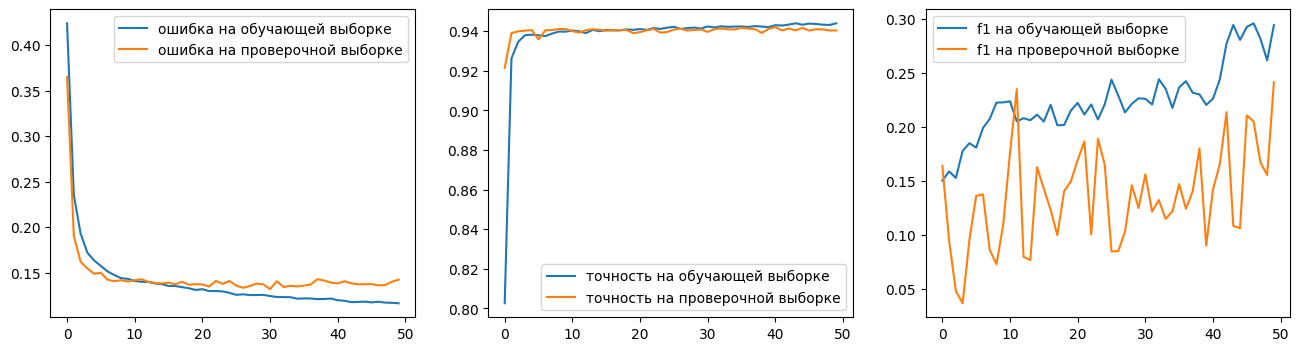

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [50, 'relu', 0.25, True],
          2: [10, 'relu', 0, False]}
lr = 0.0001
batch = 50
epochs = 50
metric_to_monitor = 'val_accuracy'
output_bias = None
res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']


лучшая средняя точность на проверочной выборке:  0.9434
лучшая средняя precision на проверочной выборке:  0.8869
лучший средний recall на проверочной выборке:  0.3817
лучший средний f1 на проверочной выборке:  0.2411
           pred_0  pred_1
actual_0  16556.0    53.0
actual_1    946.0   105.0
calc_accuracy: 0.943431483578709
calc_precision: 0.6645569620253164
calc_recall: 0.09990485252140818
111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9431
best_test_precision 0.6364
best_test_recall 0.6333
best_test_f1 0.4762
          pred_0  pred_1
actual_0    3300      22
actual_1     179      31
calc_accuracy: 0.9431
calc_precision: 0.5849
calc_recall: 0.1476


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9448
best_test_precision 0.8571
best_test_recall 0.6429
best_test_f1 0.4474
          pred_0  pred_1
actual_0    3290      32
actual_1     163      47
calc_accuracy: 0.9448
calc_precision: 0.5949
calc_recall: 0.2238


111/111 [=================

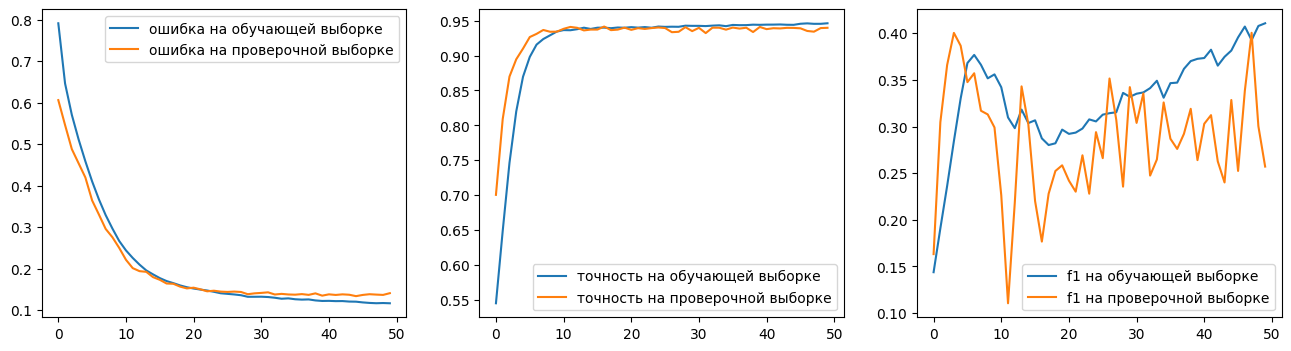

лучшая средняя точность на проверочной выборке:  0.9436
лучшая средняя precision на проверочной выборке:  0.7068
лучший средний recall на проверочной выборке:  0.7317
лучший средний f1 на проверочной выборке:  0.4005
           pred_0  pred_1
actual_0  16497.0   112.0
actual_1    884.0   167.0
calc_accuracy: 0.9436013590033975
calc_precision: 0.5985663082437276
calc_recall: 0.15889628924833493


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [50, 'relu', 0.25, True],
          2: [10, 'relu', 0, True]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9456
best_test_precision 0.5656
best_test_recall 1.0
best_test_f1 0.5294
          pred_0  pred_1
actual_0    3250      72
actual_1     120      90
calc_accuracy: 0.9456
calc_precision: 0.5556
calc_recall: 0.4286


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9502
best_test_precision 0.6892
best_test_recall 0.9524
best_test_f1 0.5495
          pred_0  pred_1
actual_0    3286      36
actual_1     140      70
calc_accuracy: 0.9502
calc_precision: 0.6604
calc_recall: 0.3333


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9437
best_test_precision 0.5484
best_test_recall 1.0
best_test_f1 0.531
          pred_0  pred_1
actual_0    3225      97
actual_1     102     108
calc_accuracy: 0.9437
calc_precision: 0.5268
calc_recall: 0.5143


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9465
best_test_precision 0.6118
best_test_recall 0.8714
best_test_f1 

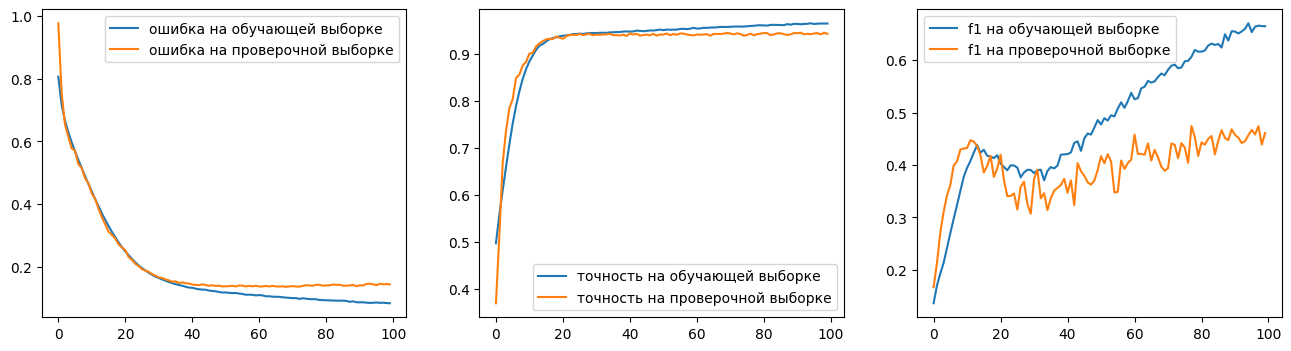

лучшая средняя точность на проверочной выборке:  0.9468
лучшая средняя precision на проверочной выборке:  0.6141
лучший средний recall на проверочной выборке:  0.943
лучший средний f1 на проверочной выборке:  0.4746
           pred_0  pred_1
actual_0  16335.0   274.0
actual_1    665.0   386.0
calc_accuracy: 0.9468289920724802
calc_precision: 0.5848484848484848
calc_recall: 0.36726926736441484


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [50, 'relu', 0.25, True],
          2: [10, 'relu', 0, True]}
lr = 0.00005
batch = 50
epochs = 100
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 6ms/step
best_test_acc 0.9437
best_test_precision 0.6667
best_test_recall 0.8238
best_test_f1 0.5184
          pred_0  pred_1
actual_0    3299      23
actual_1     176      34
calc_accuracy: 0.9437
calc_precision: 0.5965
calc_recall: 0.1619


111/111 [==============================] - 1s 7ms/step
best_test_acc 0.9462
best_test_precision 0.8333
best_test_recall 0.7952
best_test_f1 0.5113
          pred_0  pred_1
actual_0    3290      32
actual_1     158      52
calc_accuracy: 0.9462
calc_precision: 0.619
calc_recall: 0.2476


111/111 [==============================] - 1s 7ms/step
best_test_acc 0.9451
best_test_precision 0.6098
best_test_recall 0.9476
best_test_f1 0.4965
          pred_0  pred_1
actual_0    3285      37
actual_1     157      53
calc_accuracy: 0.9451
calc_precision: 0.5889
calc_recall: 0.2524


111/111 [==============================] - 1s 7ms/step
best_test_acc 0.9462
best_test_precision 0.6977
best_test_recall 0.8952
best_te

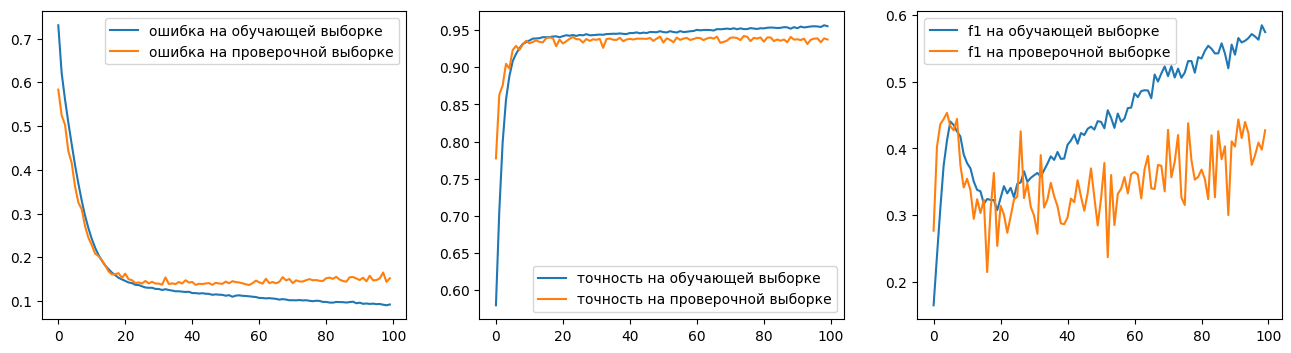

лучшая средняя точность на проверочной выборке:  0.9455
лучшая средняя precision на проверочной выборке:  0.6929
лучший средний recall на проверочной выборке:  0.8649
лучший средний f1 на проверочной выборке:  0.4532
           pred_0  pred_1
actual_0  16476.0   133.0
actual_1    829.0   222.0
calc_accuracy: 0.9455266138165346
calc_precision: 0.6253521126760564
calc_recall: 0.21122740247383445


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [1000, 'relu', 0.25, True],
          1: [500, 'relu', 0.1, True],
          2: [100, 'relu', 0.1, True],
          3: [10, 'relu', 0, True]}
lr = 0.0001
batch = 50
epochs = 100
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9411
best_test_precision 1.0
best_test_recall 0.0476
best_test_f1 0.0837
          pred_0  pred_1
actual_0    3322       0
actual_1     208       2
calc_accuracy: 0.9411
calc_precision: 1.0
calc_recall: 0.0095


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9417
best_test_precision 1.0
best_test_recall 0.1381
best_test_f1 0.214
          pred_0  pred_1
actual_0    3322       0
actual_1     206       4
calc_accuracy: 0.9417
calc_precision: 1.0
calc_recall: 0.019


111/111 [==============================] - 0s 4ms/step
best_test_acc 0.9422
best_test_precision 1.0
best_test_recall 0.4619
best_test_f1 0.2448
          pred_0  pred_1
actual_0    3322       0
actual_1     204       6
calc_accuracy: 0.9422
calc_precision: 1.0
calc_recall: 0.0286


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9417
best_test_precision 1.0
best_test_recall 0.081
best_test_f1 0.1377
          

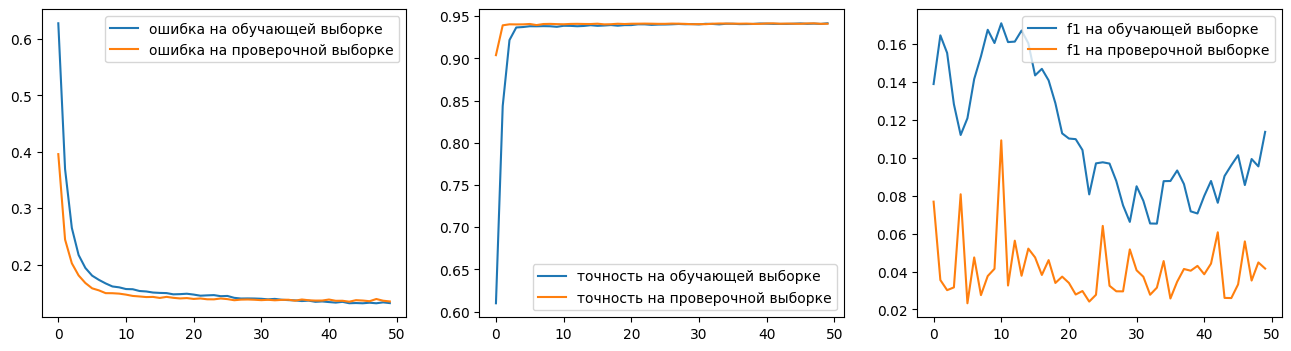

лучшая средняя точность на проверочной выборке:  0.9418
лучшая средняя precision на проверочной выборке:  1.0
лучший средний recall на проверочной выборке:  0.1561
лучший средний f1 на проверочной выборке:  0.1092
           pred_0  pred_1
actual_0  16604.0     5.0
actual_1   1023.0    28.0
calc_accuracy: 0.9417893544733862
calc_precision: 0.8484848484848485
calc_recall: 0.02664129400570885


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.5, True],
          1: [50, 'relu', 0.25, True],
          2: [10, 'relu', 0, False]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 0s 4ms/step
best_test_acc 0.9454
best_test_precision 0.7692
best_test_recall 0.5143
best_test_f1 0.4977
          pred_0  pred_1
actual_0    3309      13
actual_1     180      30
calc_accuracy: 0.9454
calc_precision: 0.6977
calc_recall: 0.1429


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9473
best_test_precision 0.7273
best_test_recall 0.7095
best_test_f1 0.5019
          pred_0  pred_1
actual_0    3298      24
actual_1     162      48
calc_accuracy: 0.9473
calc_precision: 0.6667
calc_recall: 0.2286


111/111 [==============================] - 0s 4ms/step
best_test_acc 0.9442
best_test_precision 0.7143
best_test_recall 0.519
best_test_f1 0.4719
          pred_0  pred_1
actual_0    3302      20
actual_1     177      33
calc_accuracy: 0.9442
calc_precision: 0.6226
calc_recall: 0.1571


111/111 [==============================] - 1s 8ms/step
best_test_acc 0.9437
best_test_precision 1.0
best_test_recall 0.581
best_test_f

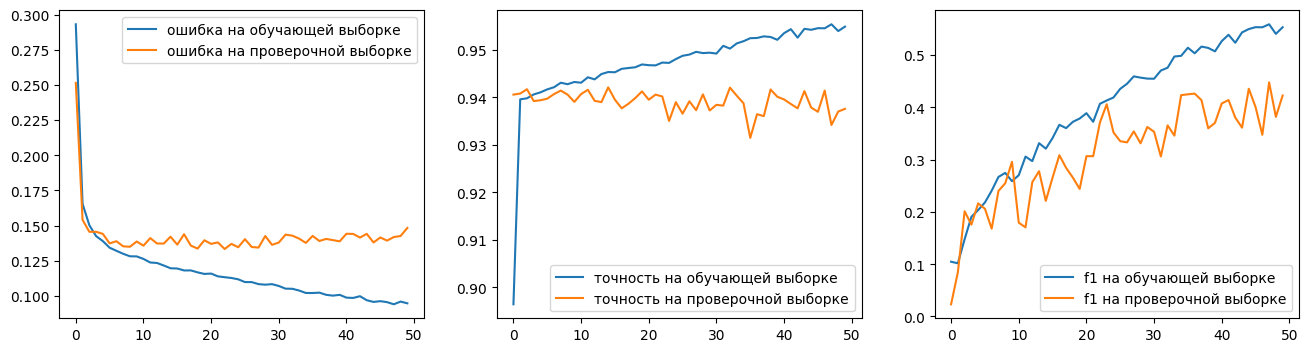

лучшая средняя точность на проверочной выборке:  0.9455
лучшая средняя precision на проверочной выборке:  0.7876
лучший средний recall на проверочной выборке:  0.6003
лучший средний f1 на проверочной выборке:  0.4478
           pred_0  pred_1
actual_0  16495.0   114.0
actual_1    848.0   203.0
calc_accuracy: 0.9455266138165346
calc_precision: 0.6403785488958991
calc_recall: 0.19314938154138916


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [50, 'relu', 0, False],
          2: [10, 'relu', 0, False]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 6ms/step
best_test_acc 0.9431
best_test_precision 1.0
best_test_recall 0.3238
best_test_f1 0.382
          pred_0  pred_1
actual_0    3285      37
actual_1     164      46
calc_accuracy: 0.9431
calc_precision: 0.5542
calc_recall: 0.219


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9462
best_test_precision 0.6667
best_test_recall 0.481
best_test_f1 0.4988
          pred_0  pred_1
actual_0    3281      41
actual_1     149      61
calc_accuracy: 0.9462
calc_precision: 0.598
calc_recall: 0.2905


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9445
best_test_precision 1.0
best_test_recall 0.6
best_test_f1 0.502
          pred_0  pred_1
actual_0    3315       7
actual_1     189      21
calc_accuracy: 0.9445
calc_precision: 0.75
calc_recall: 0.1


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9468
best_test_precision 1.0
best_test_recall 0.4857
best_test_f1 0.4533
        

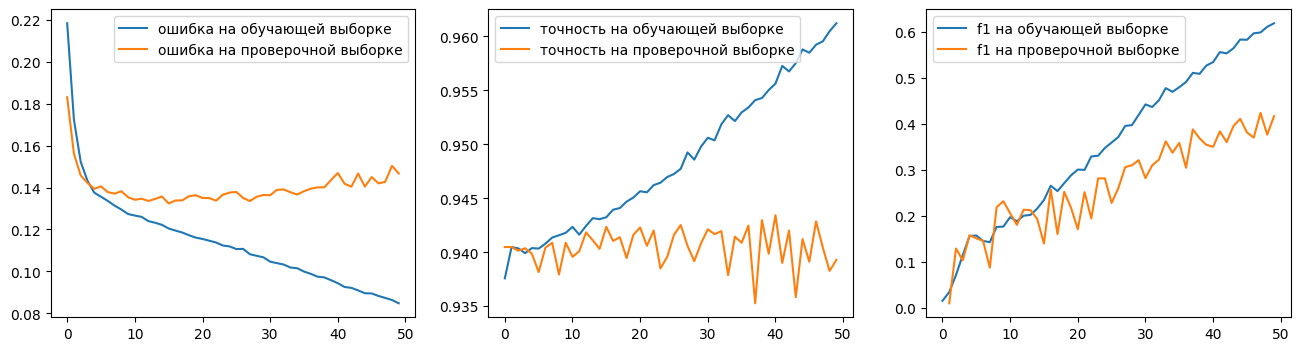

лучшая средняя точность на проверочной выборке:  0.9456
лучшая средняя precision на проверочной выборке:  0.8667
лучший средний recall на проверочной выборке:  0.5098
лучший средний f1 на проверочной выборке:  0.4239
           pred_0  pred_1
actual_0  16451.0   158.0
actual_1    803.0   248.0
calc_accuracy: 0.9455832389580974
calc_precision: 0.6108374384236454
calc_recall: 0.23596574690770694


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, False],
          1: [50, 'relu', 0, False],
          2: [10, 'relu', 0, False]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9445
best_test_precision 0.6842
best_test_recall 0.4952
best_test_f1 0.4633
          pred_0  pred_1
actual_0    3292      30
actual_1     166      44
calc_accuracy: 0.9445
calc_precision: 0.5946
calc_recall: 0.2095


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9445
best_test_precision 1.0
best_test_recall 0.4905
best_test_f1 0.4703
          pred_0  pred_1
actual_0    3278      44
actual_1     152      58
calc_accuracy: 0.9445
calc_precision: 0.5686
calc_recall: 0.2762


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9442
best_test_precision 0.7
best_test_recall 0.5714
best_test_f1 0.479
          pred_0  pred_1
actual_0    3311      11
actual_1     186      24
calc_accuracy: 0.9442
calc_precision: 0.6857
calc_recall: 0.1143


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9468
best_test_precision 0.6379
best_test_recall 0.5429
best_test_f1 

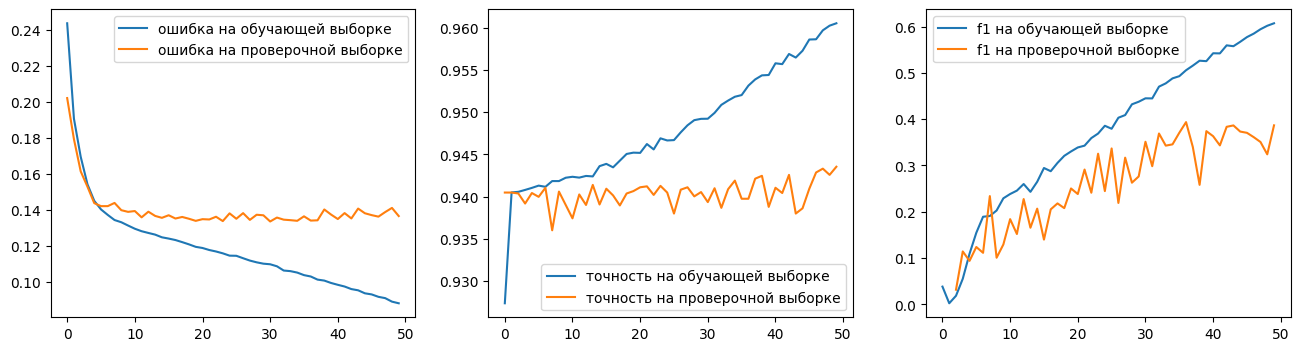

лучшая средняя точность на проверочной выборке:  0.945
лучшая средняя precision на проверочной выборке:  0.7294
лучший средний recall на проверочной выборке:  0.5413
лучший средний f1 на проверочной выборке:  0.3937
           pred_0  pred_1
actual_0  16451.0   158.0
actual_1    813.0   238.0
calc_accuracy: 0.9450169875424689
calc_precision: 0.601010101010101
calc_recall: 0.22645099904852523


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.1, False],
          1: [50, 'relu', 0, False],
          2: [10, 'relu', 0, False]}
lr = 0.00005
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [500, 'relu', 0.25, True],
          2: [50, 'relu', 0.25, True],
          3: [10, 'relu', 0, False]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = None
metric_to_monitor = 'val_accuracy'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9236
best_test_precision 0.4091
best_test_recall 0.9667
best_test_f1 0.5007
          pred_0  pred_1
actual_0    1011    2311
actual_1       7     203
calc_accuracy: 0.3437
calc_precision: 0.0807
calc_recall: 0.9667


111/111 [==============================] - 1s 4ms/step
best_test_acc 0.9312
best_test_precision 0.4233
best_test_recall 0.9286
best_test_f1 0.4849
          pred_0  pred_1
actual_0    2445     877
actual_1      15     195
calc_accuracy: 0.7475
calc_precision: 0.1819
calc_recall: 0.9286


111/111 [==============================] - 1s 5ms/step
best_test_acc 0.9153
best_test_precision 0.3781
best_test_recall 0.9429
best_test_f1 0.5035
          pred_0  pred_1
actual_0    2784     538
actual_1      12     198
calc_accuracy: 0.8443
calc_precision: 0.269
calc_recall: 0.9429


111/111 [==============================] - 1s 6ms/step
best_test_acc 0.932
best_test_precision 0.3613
best_test_recall 0.9476
best_tes

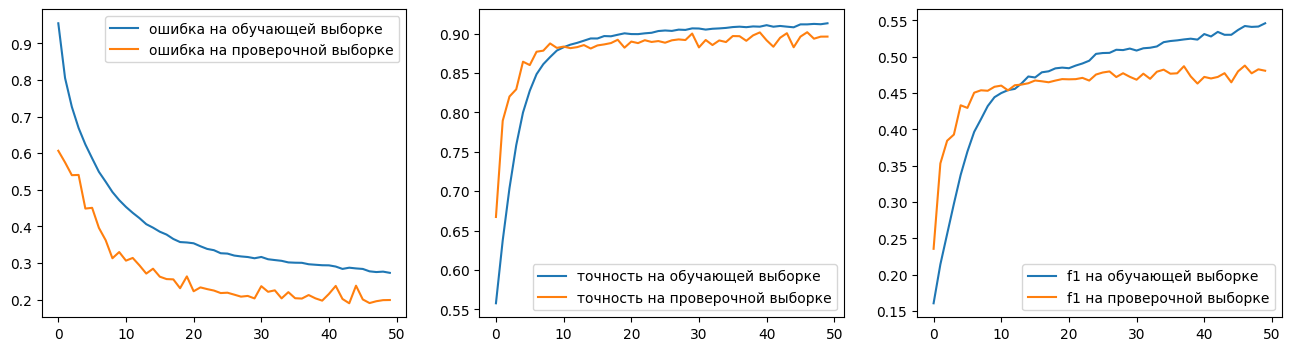

лучшая средняя точность на проверочной выборке:  0.9236
лучшая средняя precision на проверочной выборке:  0.3902
лучший средний recall на проверочной выборке:  0.9534
лучший средний f1 на проверочной выборке:  0.4878
           pred_0  pred_1
actual_0  10347.0  6262.0
actual_1     49.0  1002.0
calc_accuracy: 0.6426387315968289
calc_precision: 0.13794052863436124
calc_recall: 0.9533777354900095


In [116]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle = True)
layers = {0: [500, 'relu', 0.25, True],
          1: [50, 'relu', 0.25, True],
          2: [10, 'relu', 0, True]}
lr = 0.0001
batch = 50
epochs = 50
output_bias = target_binary.sum()/len(target_binary)
class_weight = {0:1, 1:5}
metric_to_monitor = 'val_recall'

res = evaluate_nn_new(cv, layers=layers, lr = lr , batch=batch, epochs=epochs, class_weight = class_weight, metric_to_monitor = metric_to_monitor, plots=True, output_bias = output_bias)

n = len(results.keys())+1
results[n] = dict()
results[n]['layers'] = layers
results[n]['lr'] = lr
results[n]['batch'] = batch
results[n]['epochs'] = epochs
results[n]['metric_to_monitor'] = metric_to_monitor
results[n]['bias'] = output_bias
results[n]['acc'] = res['history_test_acc']
results[n]['precision'] = res['history_test_precision']
results[n]['recall'] = res['history_test_recall']
results[n]['f1'] = res['history_test_f1']
results[n]['confusion_matrix'] = res['confusion_matrix']

In [117]:
models_by_acc = [(key, np.round(np.mean(results[key]['acc'].iloc[:,:5].max()),4)) for key in sorted(results, key = lambda x: np.mean(results[x]['acc'].iloc[:,:5].max()), reverse=True)]

models_by_acc

[(3, 0.9468),
 (7, 0.9456),
 (6, 0.9455),
 (4, 0.9455),
 (8, 0.945),
 (2, 0.9436),
 (1, 0.9434),
 (9, 0.9425),
 (5, 0.9418),
 (10, 0.9236)]

In [118]:
print('best model by accuracy characteristics:', '\n')
print('accuracy (mean cross_val_score): ', np.round(np.mean(results[models_by_acc[0][0]]['acc'].iloc[:,:5].max()),4), '\n')
print('recall (mean cross_val_score): ', np.round(np.mean(results[models_by_acc[0][0]]['recall'].iloc[:,:5].max()),4), '\n')
print('layers: {номер слоя: [кол-во нейронов, ф-я активации, Dropout rate, BatchNormalization(True/False]}', results[models_by_acc[0][0]]['layers'], '\n', sep = '\n')
print('learning rate: ', results[models_by_acc[0][0]]['lr'], '\n')
print('n epochs: ', results[models_by_acc[0][0]]['epochs'], '\n')
print('metric to determine best model (used in ModelCheckpoint callback): ', results[models_by_acc[0][0]]['metric_to_monitor'])


best model by accuracy characteristics: 

accuracy (mean cross_val_score):  0.9468 

recall (mean cross_val_score):  0.943 

layers: {номер слоя: [кол-во нейронов, ф-я активации, Dropout rate, BatchNormalization(True/False]}
{0: [500, 'relu', 0.25, True], 1: [50, 'relu', 0.25, True], 2: [10, 'relu', 0, True]}


learning rate:  5e-05 

n epochs:  100 

metric to determine best model (used in ModelCheckpoint callback):  val_accuracy


In [119]:
models_by_recall = [(key, np.round(np.mean(results[key]['recall'].iloc[:,:5].max()),4)) for key in sorted(results, key = lambda x: np.mean(results[x]['recall'].iloc[:,:5].max()), reverse=True)]

models_by_recall

[(10, 0.9534),
 (3, 0.943),
 (4, 0.8649),
 (2, 0.7317),
 (6, 0.6003),
 (8, 0.5413),
 (7, 0.5098),
 (1, 0.3817),
 (9, 0.24),
 (5, 0.1561)]

In [120]:
print('best model by recall characteristics:', '\n')
print('accuracy (mean cross_val_score): ', np.round(np.mean(results[models_by_recall[0][0]]['acc'].iloc[:,:5].max()),4), '\n')
print('recall (mean cross_val_score): ', np.round(np.mean(results[models_by_recall[0][0]]['recall'].iloc[:,:5].max()),4), '\n')
print('layers: {номер слоя: [кол-во нейронов, ф-я активации, Dropout rate, BatchNormalization(True/False]}', results[models_by_recall[0][0]]['layers'], '\n', sep = '\n')
print('learning rate: ', results[models_by_recall[0][0]]['lr'], '\n')
print('n epochs: ', results[models_by_recall[0][0]]['epochs'], '\n')
print('metric to determine best model (used in ModelCheckpoint callback): ', results[models_by_recall[0][0]]['metric_to_monitor'])


best model by recall characteristics: 

accuracy (mean cross_val_score):  0.9236 

recall (mean cross_val_score):  0.9534 

layers: {номер слоя: [кол-во нейронов, ф-я активации, Dropout rate, BatchNormalization(True/False]}
{0: [500, 'relu', 0.25, True], 1: [50, 'relu', 0.25, True], 2: [10, 'relu', 0, True]}


learning rate:  0.0001 

n epochs:  50 

metric to determine best model (used in ModelCheckpoint callback):  val_recall
